## Ermittlung der Entwicklung des Fahrradtrends in Berlin/Düsseldorf (2013 - 2019)

### -wie wird sich der Trend in den nächsten Jahren event. weiterentwickeln?
### -inwiefern spielt die Temperatur/Jahreszeit eine Rolle?
### -wie verändert sich der Trend der Fahrradfahrer während der Pandemie (Berlin)?

Datenquellen:

Dauerzählstellen - Berlin:
https://www.berlin.de/sen/uvk/verkehr/verkehrsplanung/radverkehr/weitere-radinfrastruktur/zaehlstellen-und-fahrradbarometer/#dauer

Dauerzählstellen - Düsseldorf:
https://opendata.duesseldorf.de/dataset/jahres%C3%BCbersicht-der-dauerz%C3%A4hlstellen-radverkehr-seit-2012#
https://open.nrw/dataset/jahresuebersicht-der-dauerzaehlstellen-radverkehr-seit-2012-d
https://www.eco-public.com/ParcPublic/?id=857

-----------------------------------------------------------------------------------------------------------------------

Corona Daten - Berlin:
https://daten.berlin.de/datensaetze/covid-19-berlin-fallzahlen-und-indikatoren-gesamt%C3%BCbersicht



In [1]:
# für tabellerische Daten wie Excel
import pandas as pd 
# für nummerische Analyse
import numpy as np  
# für grafische ploten
import matplotlib.pyplot as plt 
%matplotlib inline    
# für grafische ploten
import seaborn as sns   

import os

## Daten einlesen, bereinigen und abspeichern

### Einlesung von Dateien aus den Dauerradzählstellen für die Jahre 2013-2020 aus Düsseldorf

In [2]:
bikes_duesseldorf_df_2013 = pd.read_csv('bikes_duesseldorf_2013.csv', delimiter=';', parse_dates=True, index_col='Datum' )
bikes_duesseldorf_df_2014 = pd.read_csv('bikes_duesseldorf_2014.csv', delimiter=';', parse_dates=True, index_col='Datum' )
bikes_duesseldorf_df_2015 = pd.read_csv('bikes_duesseldorf_2015.csv', delimiter=';', parse_dates=True, index_col='Datum' )
bikes_duesseldorf_df_2016 = pd.read_csv('bikes_duesseldorf_2016.csv', delimiter=';', parse_dates=True, index_col='Datum' )
bikes_duesseldorf_df_2017 = pd.read_csv('bikes_duesseldorf_2017.csv', delimiter=';', parse_dates=True, index_col='Datum' )
bikes_duesseldorf_df_2018 = pd.read_csv('bikes_duesseldorf_2018.csv', delimiter=';', parse_dates=True, index_col='Datum' )
bikes_duesseldorf_df_2019 = pd.read_csv('bikes_duesseldorf_2019.csv', delimiter=';', parse_dates=True, index_col='Datum' )
bikes_duesseldorf_df_2020 = pd.read_csv('bikes_duesseldorf_2020.csv', delimiter=';', parse_dates=True, index_col='Datum' )

In [3]:
bikes_duesseldorf_df_2020.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35136 entries, 2020-01-01 to 2020-12-31
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Uhrzeit                          35136 non-null  object 
 1   Bilker Allee IN                  34828 non-null  float64
 2   Bilker Allee OUT                 30875 non-null  float64
 3   Christophstrasse                 35124 non-null  float64
 4   Elisabethstrasse                 35132 non-null  float64
 5   Fleher Deich                     35132 non-null  float64
 6   Fleher Deich Ost stromaufwaerts  35132 non-null  float64
 7   Fleher Deich Rampe               35132 non-null  float64
 8   Fleher Deich west stromabwaerts  35132 non-null  float64
 9   Friedrichstrasse                 35116 non-null  float64
 10  Kirchfeldstrasse                 35132 non-null  float64
 11  Koblenzer einwaerts nach TLS     35132 non-null  float64
 12  K

## Data cleaning

### -Duplikate von Meswerten wurden entfernt
### -Leere Zellen wurden mit Null ersetzt (NaN->0)
### -Ab Jahr 2014 wurden zusätzlichen Zählstationen in Betrieb genommen (16 Stück)
### - Im Jahr 2020 kammen zwei Zählstationen dazu, die wir für einen besseren Vergleich ausgeschnitten haben.
### -Vereinheitlichung der Spaltennamen (Umlaute etc.)

In [12]:
bikes_duesseldorf_df_2020.columns

Index(['Uhrzeit', 'Bilker Allee IN', 'Bilker Allee OUT', 'Christophstrasse',
       'Elisabethstrasse', 'Fleher Deich', 'Fleher Deich Ost stromaufwaerts',
       'Fleher Deich Rampe', 'Fleher Deich west stromabwaerts',
       'Friedrichstrasse', 'Kirchfeldstrasse', 'Koblenzer einwaerts nach TLS',
       'Koblenzer einwaerts vor TLS', 'Koblenzer stadtauswaerts',
       'Koblenzer Strasse', 'Koe Steinstrasse', 'Lohauser Deich',
       'Mannesmann Ufer', 'Muenchener/ Ickeswarder Str',
       'Oberkasseler Bruecke', 'OKB Nord', 'OKB Sued'],
      dtype='object')

In [13]:
bikes_duesseldorf_df_2013 = bikes_duesseldorf_df_2013.drop(columns=['Koblenzer stadtauswärtss'])
bikes_duesseldorf_df_2014 = bikes_duesseldorf_df_2014.drop(columns=['Koblenzer stadtauswärtss'])
bikes_duesseldorf_df_2015 = bikes_duesseldorf_df_2015.drop(columns=['Koblenzer stadtauswaertss'])
bikes_duesseldorf_df_2016 = bikes_duesseldorf_df_2016.drop(columns=['Koblenzer stadtauswaertss'])
bikes_duesseldorf_df_2017 = bikes_duesseldorf_df_2017.drop(columns=['Koblenzer stadtauswaertss'])
bikes_duesseldorf_df_2020 = bikes_duesseldorf_df_2020.drop(columns=['Fleher Deich', 'Fleher Deich Rampe', 
                                                                   'Koblenzer Strasse', 'Muenchener/ Ickeswarder Str',
                                                                'Oberkasseler Bruecke' ])

In [ ]:
## NaN-Werte mit Null ersetzen
## bikes_duesseldorf_df_2020.fillna(0)

In [14]:
bikes_duesseldorf_df_2018.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35040 entries, 2018-01-01 to 2018-12-31
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Uhrzeit                          35040 non-null  object 
 1   Bilker Allee IN                  35040 non-null  int64  
 2   Bilker Allee OUT                 35040 non-null  int64  
 3   Christophstrasse                 35033 non-null  float64
 4   Elisabethstrasse                 35040 non-null  int64  
 5   Fleher Deich Ost stromaufwaerts  35040 non-null  int64  
 6   Fleher Deich west stromabwaerts  35040 non-null  int64  
 7   Friedrichstrasse                 35040 non-null  int64  
 8   Kirchfeldstrasse                 35039 non-null  float64
 9   Koblenzer einwaerts nach TLS     35040 non-null  int64  
 10  Koblenzer einwaerts vor TLS      35040 non-null  int64  
 11  Koblenzer stadtauswaerts         35035 non-null  float64
 12  K

### Vereinheitlichung der Spaltennamen (Umlaute etc.)

In [15]:

bikes_duesseldorf_df_2013.set_axis(['Uhrzeit', 'Bilker Allee IN', 'Bilker Allee OUT', 'Christophstrasse',
       'Elisabethstrasse', 'Fleher Deich Ost stromaufwaerts',
       'Fleher Deich west stromabwaerts', 'Friedrichstrasse',
       'Kirchfeldstrasse', 'Koblenzer einwaerts nach TLS',
       'Koblenzer einwaerts vor TLS', 'Koblenzer stadtauswaerts',
       'Koe Steinstrasse', 'Lohauser Deich', 'Mannesmann Ufer', 'OKB Nord',
       'OKB Sued'], axis='columns', inplace=True)

bikes_duesseldorf_df_2014.set_axis(['Uhrzeit', 'Bilker Allee IN', 'Bilker Allee OUT', 'Christophstrasse',
       'Elisabethstrasse', 'Fleher Deich Ost stromaufwaerts',
       'Fleher Deich west stromabwaerts', 'Friedrichstrasse',
       'Kirchfeldstrasse', 'Koblenzer einwaerts nach TLS',
       'Koblenzer einwaerts vor TLS', 'Koblenzer stadtauswaerts',
       'Koe Steinstrasse', 'Lohauser Deich', 'Mannesmann Ufer', 'OKB Nord',
       'OKB Sued'], axis='columns', inplace=True)

bikes_duesseldorf_df_2015.set_axis(['Uhrzeit', 'Bilker Allee IN', 'Bilker Allee OUT', 'Christophstrasse',
       'Elisabethstrasse', 'Fleher Deich Ost stromaufwaerts',
       'Fleher Deich west stromabwaerts', 'Friedrichstrasse',
       'Kirchfeldstrasse', 'Koblenzer einwaerts nach TLS',
       'Koblenzer einwaerts vor TLS', 'Koblenzer stadtauswaerts',
       'Koe Steinstrasse', 'Lohauser Deich', 'Mannesmann Ufer', 'OKB Nord',
       'OKB Sued'], axis='columns', inplace=True)

bikes_duesseldorf_df_2016.set_axis(['Uhrzeit', 'Bilker Allee IN', 'Bilker Allee OUT', 'Christophstrasse',
       'Elisabethstrasse', 'Fleher Deich Ost stromaufwaerts',
       'Fleher Deich west stromabwaerts', 'Friedrichstrasse',
       'Kirchfeldstrasse', 'Koblenzer einwaerts nach TLS',
       'Koblenzer einwaerts vor TLS', 'Koblenzer stadtauswaerts',
       'Koe Steinstrasse', 'Lohauser Deich', 'Mannesmann Ufer', 'OKB Nord',
       'OKB Sued'], axis='columns', inplace=True)

bikes_duesseldorf_df_2017.set_axis(['Uhrzeit', 'Bilker Allee IN', 'Bilker Allee OUT', 'Christophstrasse',
       'Elisabethstrasse', 'Fleher Deich Ost stromaufwaerts',
       'Fleher Deich west stromabwaerts', 'Friedrichstrasse',
       'Kirchfeldstrasse', 'Koblenzer einwaerts nach TLS',
       'Koblenzer einwaerts vor TLS', 'Koblenzer stadtauswaerts',
       'Koe Steinstrasse', 'Lohauser Deich', 'Mannesmann Ufer', 'OKB Nord',
       'OKB Sued'], axis='columns', inplace=True)

bikes_duesseldorf_df_2018.set_axis(['Uhrzeit', 'Bilker Allee IN', 'Bilker Allee OUT', 'Christophstrasse',
       'Elisabethstrasse', 'Fleher Deich Ost stromaufwaerts',
       'Fleher Deich west stromabwaerts', 'Friedrichstrasse',
       'Kirchfeldstrasse', 'Koblenzer einwaerts nach TLS',
       'Koblenzer einwaerts vor TLS', 'Koblenzer stadtauswaerts',
       'Koe Steinstrasse', 'Lohauser Deich', 'Mannesmann Ufer', 'OKB Nord',
       'OKB Sued'], axis='columns', inplace=True)

bikes_duesseldorf_df_2019.set_axis(['Uhrzeit', 'Bilker Allee IN', 'Bilker Allee OUT', 'Christophstrasse',
       'Elisabethstrasse', 'Fleher Deich Ost stromaufwaerts',
       'Fleher Deich west stromabwaerts', 'Friedrichstrasse',
       'Kirchfeldstrasse', 'Koblenzer einwaerts nach TLS',
       'Koblenzer einwaerts vor TLS', 'Koblenzer stadtauswaerts',
       'Koe Steinstrasse', 'Lohauser Deich', 'Mannesmann Ufer', 'OKB Nord',
       'OKB Sued'], axis='columns', inplace=True)

bikes_duesseldorf_df_2020.set_axis(['Uhrzeit', 'Bilker Allee IN', 'Bilker Allee OUT', 'Christophstrasse',
       'Elisabethstrasse', 'Fleher Deich Ost stromaufwaerts',
       'Fleher Deich west stromabwaerts', 'Friedrichstrasse',
       'Kirchfeldstrasse', 'Koblenzer einwaerts nach TLS',
       'Koblenzer einwaerts vor TLS', 'Koblenzer stadtauswaerts',
       'Koe Steinstrasse', 'Lohauser Deich', 'Mannesmann Ufer', 'OKB Nord',
       'OKB Sued'], axis='columns', inplace=True)

In [16]:
bikes_duesseldorf_df_2014.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35040 entries, 2014-01-01 to 2014-12-31
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Uhrzeit                          35040 non-null  object 
 1   Bilker Allee IN                  35040 non-null  int64  
 2   Bilker Allee OUT                 35040 non-null  int64  
 3   Christophstrasse                 1344 non-null   float64
 4   Elisabethstrasse                 0 non-null      float64
 5   Fleher Deich Ost stromaufwaerts  35040 non-null  int64  
 6   Fleher Deich west stromabwaerts  35040 non-null  int64  
 7   Friedrichstrasse                 0 non-null      float64
 8   Kirchfeldstrasse                 35040 non-null  int64  
 9   Koblenzer einwaerts nach TLS     35040 non-null  int64  
 10  Koblenzer einwaerts vor TLS      35040 non-null  int64  
 11  Koblenzer stadtauswaerts         35040 non-null  int64  
 12  K

### Zusamenfügen der Dateien für den Zeitraum 2013-2020

In [17]:
df1 = bikes_duesseldorf_df_2013.append(bikes_duesseldorf_df_2014, ignore_index=False)
df2 = df1.append(bikes_duesseldorf_df_2015, ignore_index=False)
df3 = df2.append(bikes_duesseldorf_df_2016, ignore_index=False)
df4 = df3.append(bikes_duesseldorf_df_2017, ignore_index=False)
df5 = df4.append(bikes_duesseldorf_df_2018, ignore_index=False)
df6 = df5.append(bikes_duesseldorf_df_2019, ignore_index=False)
bikes_duesseldorf_df_2013_2020 = df6.append(bikes_duesseldorf_df_2020, ignore_index=False)

In [18]:
bikes_duesseldorf_df_2013_2020.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 280512 entries, 2013-01-01 to 2020-12-31
Data columns (total 17 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Uhrzeit                          280512 non-null  object 
 1   Bilker Allee IN                  247231 non-null  float64
 2   Bilker Allee OUT                 243279 non-null  float64
 3   Christophstrasse                 210469 non-null  float64
 4   Elisabethstrasse                 150600 non-null  float64
 5   Fleher Deich Ost stromaufwaerts  247442 non-null  float64
 6   Fleher Deich west stromabwaerts  233820 non-null  float64
 7   Friedrichstrasse                 148225 non-null  float64
 8   Kirchfeldstrasse                 235651 non-null  float64
 9   Koblenzer einwaerts nach TLS     247633 non-null  float64
 10  Koblenzer einwaerts vor TLS      245270 non-null  float64
 11  Koblenzer stadtauswaerts         237646 non-null 

### 280 512 Datensätze, 2013-01-01 bis 2020-12-31

In [19]:
bikes_duesseldorf_df_2013_2020

,Uhrzeit,Bilker Allee IN,Bilker Allee OUT,Christophstrasse,Elisabethstrasse,Fleher Deich Ost stromaufwaerts,Fleher Deich west stromabwaerts,Friedrichstrasse,Kirchfeldstrasse,Koblenzer einwaerts nach TLS,Koblenzer einwaerts vor TLS,Koblenzer stadtauswaerts,Koe Steinstrasse,Lohauser Deich,Mannesmann Ufer,OKB Nord,OKB Sued
Datum,,,,,,,,,,,,,,,,,
2013-01-01,00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,4.0,5.0
2013-01-01,00:15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,7.0
2013-01-01,00:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,0.0,3.0
2013-01-01,00:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,1.0,4.0
2013-01-01,01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31,22:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.0,0.0,1.0
2020-12-31,23:00:00,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,2.0,4.0
2020-12-31,23:15:00,0.0,2.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,8.0,0.0,0.0


## Umgeformte Datensätze von 1.1.2013 bis 31.12.2020 werden in einer Persistenzschicht abgespeichert in ein eigenes Dataframe (.csv)

In [275]:
bikes_duesseldorf_df_2013_2020.to_csv("bikes_duesseldorf_df_2013_2020.csv", sep=";" )

In [276]:
x=pd.read_csv('bikes_duesseldorf_df_2013_2020.csv', delimiter=';', parse_dates=True, index_col='Datum' )

In [278]:
x.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 280512 entries, 2013-01-01 to 2020-12-31
Data columns (total 17 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Uhrzeit                          280512 non-null  object 
 1   Bilker Allee IN                  247231 non-null  float64
 2   Bilker Allee OUT                 243279 non-null  float64
 3   Christophstrasse                 210469 non-null  float64
 4   Elisabethstrasse                 150600 non-null  float64
 5   Fleher Deich Ost stromaufwaerts  247442 non-null  float64
 6   Fleher Deich west stromabwaerts  233820 non-null  float64
 7   Friedrichstrasse                 148225 non-null  float64
 8   Kirchfeldstrasse                 235651 non-null  float64
 9   Koblenzer einwaerts nach TLS     247633 non-null  float64
 10  Koblenzer einwaerts vor TLS      245270 non-null  float64
 11  Koblenzer stadtauswaerts         237646 non-null 

In [20]:
bikes_duesseldorf_df_2013_2020.describe()

,Bilker Allee IN,Bilker Allee OUT,Christophstrasse,Elisabethstrasse,Fleher Deich Ost stromaufwaerts,Fleher Deich west stromabwaerts,Friedrichstrasse,Kirchfeldstrasse,Koblenzer einwaerts nach TLS,Koblenzer einwaerts vor TLS,Koblenzer stadtauswaerts,Koe Steinstrasse,Lohauser Deich,Mannesmann Ufer,OKB Nord,OKB Sued
count,247231.000000,243279.000000,210469.000000,150600.000000,247442.000000,233820.000000,148225.000000,235651.000000,247633.000000,245270.000000,237646.000000,279276.000000,246389.00000,247580.000000,274958.000000,280508.000000
mean,2.814255,2.562342,9.201398,4.978440,4.518117,5.461582,8.220739,12.666435,4.596948,5.270608,7.973002,16.263363,10.19276,28.576008,15.111533,9.532124
std,3.166082,2.927244,10.094190,5.505905,6.743482,8.933870,8.800426,12.896970,10.135672,11.653708,10.195249,18.893693,19.04992,33.234063,17.330539,13.898665
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.00000,3.000000,2.000000,1.000000
50%,2.000000,2.000000,6.000000,3.000000,2.000000,2.000000,5.000000,9.000000,2.000000,2.000000,4.000000,9.000000,3.00000,17.000000,9.000000,5.000000
75%,4.000000,4.000000,14.000000,8.000000,6.000000,7.000000,14.000000,20.000000,6.000000,6.000000,12.000000,26.000000,11.00000,42.000000,23.000000,14.000000
max,134.000000,255.000000,261.000000,58.000000,266.000000,197.000000,76.000000,293.000000,278.000000,199.000000,452.000000,2059.000000,526.00000,413.000000,747.000000,577.000000


### Datengrupierung- Tagenweise

In [23]:
# gruppieren

bikes_duesseldorf_df_2013_2020_days = bikes_duesseldorf_df_2013_2020.groupby(bikes_duesseldorf_df_2013_2020.index).sum()

In [24]:
bikes_duesseldorf_df_2013_2020_days

,Bilker Allee IN,Bilker Allee OUT,Christophstrasse,Elisabethstrasse,Fleher Deich Ost stromaufwaerts,Fleher Deich west stromabwaerts,Friedrichstrasse,Kirchfeldstrasse,Koblenzer einwaerts nach TLS,Koblenzer einwaerts vor TLS,Koblenzer stadtauswaerts,Koe Steinstrasse,Lohauser Deich,Mannesmann Ufer,OKB Nord,OKB Sued
Datum,,,,,,,,,,,,,,,,
2013-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,165.0,0.0,0.0,147.0,93.0
2013-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,728.0,0.0,0.0,552.0,211.0
2013-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1055.0,0.0,0.0,852.0,386.0
2013-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,454.0,0.0,0.0,594.0,465.0
2013-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1505.0,0.0,0.0,2076.0,1860.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,62.0,99.0,120.0,79.0,56.0,71.0,96.0,228.0,40.0,45.0,80.0,142.0,92.0,393.0,131.0,88.0
2020-12-28,183.0,181.0,428.0,271.0,427.0,471.0,501.0,824.0,142.0,166.0,380.0,734.0,903.0,1638.0,816.0,713.0
2020-12-29,206.0,0.0,354.0,286.0,280.0,340.0,513.0,796.0,161.0,191.0,360.0,775.0,459.0,1365.0,709.0,686.0


bikes_duesseldorf_df_2013_2020_days.info()

## Datenvisualisierung

### Darstellung der Werte der letzten 8 Jahre von der zuerst instalierten Zahlstation OKB Nord

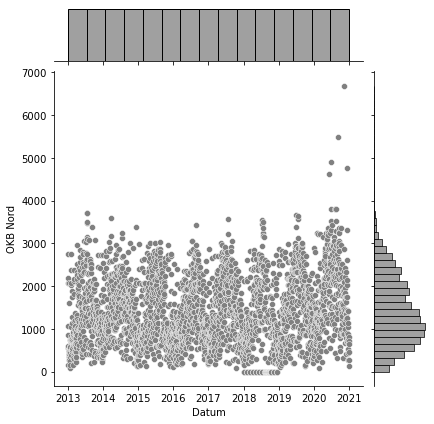

In [26]:
sns.jointplot(x=bikes_duesseldorf_df_2013_2020_days.index, 
              y='OKB Nord', data = bikes_duesseldorf_df_2013_2020_days, color = 'grey', kind='scatter')

<AxesSubplot:xlabel='Datum'>

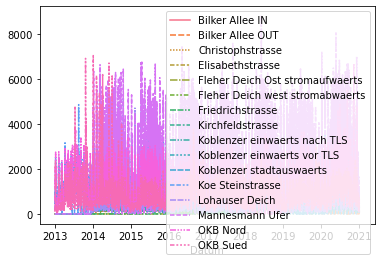

In [27]:
sns.lineplot(data = bikes_duesseldorf_df_2013_2020_days)

In [28]:
# gleitender Mittelwert Fenster

bikes_duesseldorf_df_2013_2020_days_roll = bikes_duesseldorf_df_2013_2020_days.rolling('30D').mean()

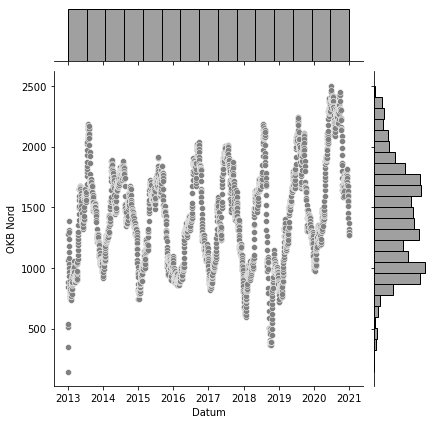

In [29]:
sns.jointplot(x=bikes_duesseldorf_df_2013_2020_days_roll.index, 
              y='OKB Nord', data = bikes_duesseldorf_df_2013_2020_days_roll, color = 'grey')

<AxesSubplot:xlabel='Datum', ylabel='OKB Nord'>

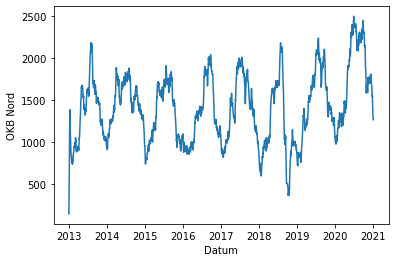

In [30]:
sns.lineplot(x=bikes_duesseldorf_df_2013_2020_days_roll.index, 
             y='OKB Nord', data = bikes_duesseldorf_df_2013_2020_days_roll)

### Verlauf der einzelnen Zählstellen

<AxesSubplot:xlabel='Datum'>

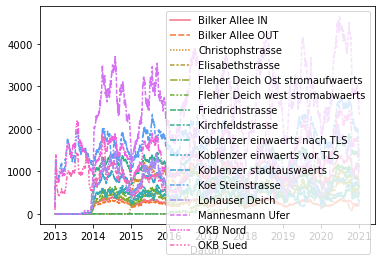

In [31]:
sns.lineplot(data = bikes_duesseldorf_df_2013_2020_days_roll)

### Die tägliche Summe der Werte für alle Zählstationen

In [32]:
# Zeilenweise addieren:

bikes_duesseldorf_df_2013_2020_days_sum = bikes_duesseldorf_df_2013_2020_days.copy()
bikes_duesseldorf_df_2013_2020_days_sum['sum'] = bikes_duesseldorf_df_2013_2020_days_sum.loc[:].sum(axis=1)

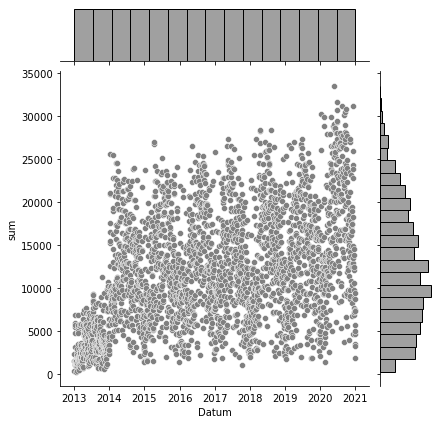

In [35]:
sns.jointplot(x=bikes_duesseldorf_df_2013_2020_days_sum.index, 
              y='sum', data = bikes_duesseldorf_df_2013_2020_days_sum, color = 'grey', kind='scatter')

In [33]:
bikes_duesseldorf_df_2013_2020_days_sum.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2922 entries, 2013-01-01 to 2020-12-31
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Bilker Allee IN                  2922 non-null   float64
 1   Bilker Allee OUT                 2922 non-null   float64
 2   Christophstrasse                 2922 non-null   float64
 3   Elisabethstrasse                 2922 non-null   float64
 4   Fleher Deich Ost stromaufwaerts  2922 non-null   float64
 5   Fleher Deich west stromabwaerts  2922 non-null   float64
 6   Friedrichstrasse                 2922 non-null   float64
 7   Kirchfeldstrasse                 2922 non-null   float64
 8   Koblenzer einwaerts nach TLS     2922 non-null   float64
 9   Koblenzer einwaerts vor TLS      2922 non-null   float64
 10  Koblenzer stadtauswaerts         2922 non-null   float64
 11  Koe Steinstrasse                 2922 non-null   float64
 12  Lo

In [34]:
bikes_duesseldorf_df_2013_2020_days_sum.describe()

,Bilker Allee IN,Bilker Allee OUT,Christophstrasse,Elisabethstrasse,Fleher Deich Ost stromaufwaerts,Fleher Deich west stromabwaerts,Friedrichstrasse,Kirchfeldstrasse,Koblenzer einwaerts nach TLS,Koblenzer einwaerts vor TLS,Koblenzer stadtauswaerts,Koe Steinstrasse,Lohauser Deich,Mannesmann Ufer,OKB Nord,OKB Sued,sum
count,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.00000
mean,238.114648,213.334702,662.768309,256.588980,382.605065,437.038672,417.015400,1021.511978,389.581109,442.409993,648.443532,1554.403491,859.474333,2421.234771,1421.983915,915.070842,12281.57974
std,138.205597,122.082269,524.778804,286.960766,305.997755,427.422574,469.558578,668.255029,276.570268,311.773418,442.938889,896.263477,946.852447,1685.641636,795.956850,585.019164,6725.42078
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,63.000000,292.00000
25%,151.000000,137.000000,102.500000,0.000000,147.000000,116.500000,0.000000,502.250000,156.000000,185.000000,302.000000,818.250000,196.250000,1168.000000,811.250000,494.250000,6830.25000
50%,237.000000,220.000000,648.000000,175.500000,329.000000,327.500000,184.500000,1098.000000,361.500000,414.000000,664.500000,1459.500000,481.500000,2201.000000,1313.000000,828.000000,11732.50000
75%,337.000000,301.750000,1080.750000,477.000000,572.000000,654.000000,826.000000,1524.750000,591.750000,670.000000,963.750000,2173.750000,1289.750000,3628.500000,1994.500000,1247.000000,17235.50000
max,736.000000,644.000000,2083.000000,1112.000000,2096.000000,3518.000000,1964.000000,2764.000000,1204.000000,1345.000000,3526.000000,4857.000000,6610.000000,8784.000000,6688.000000,7071.000000,33532.00000


In [36]:
# gleitender Mittelwert Fenster

bikes_duesseldorf_df_2013_2020_days_sum_roll = bikes_duesseldorf_df_2013_2020_days_sum.rolling('30D').mean()

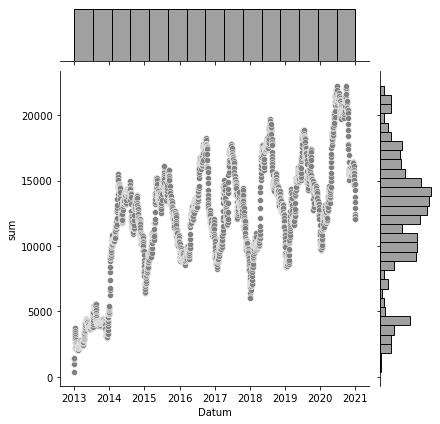

In [37]:
sns.jointplot(x=bikes_duesseldorf_df_2013_2020_days_sum_roll.index, 
              y='sum', data = bikes_duesseldorf_df_2013_2020_days_sum_roll, color = 'grey', kind='scatter')

<AxesSubplot:xlabel='Datum', ylabel='sum'>

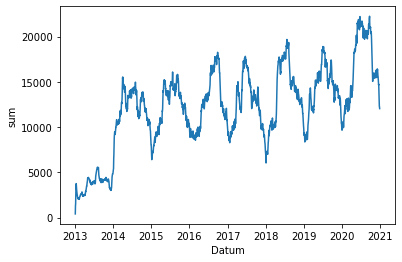

In [38]:
sns.lineplot(x=bikes_duesseldorf_df_2013_2020_days_sum_roll.index, 
             y='sum', data = bikes_duesseldorf_df_2013_2020_days_sum_roll)

In [39]:
#sns.barplot(x=bikes_duesseldorf_df_2013_2020_days_sum.index, y='sum', 
#             data = bikes_duesseldorf_df_2013_2020_days_sum)

#plt.xticks(rotation=70)
#plt.tight_layout()

In [40]:
################################################################

## Jährliche Werte für alle Messstationen

### Gesamtzahl an Fahrrädern pro Jahr

In [42]:
bikes_duesseldorf_df_2013_2020_days_sum.describe()

,Bilker Allee IN,Bilker Allee OUT,Christophstrasse,Elisabethstrasse,Fleher Deich Ost stromaufwaerts,Fleher Deich west stromabwaerts,Friedrichstrasse,Kirchfeldstrasse,Koblenzer einwaerts nach TLS,Koblenzer einwaerts vor TLS,Koblenzer stadtauswaerts,Koe Steinstrasse,Lohauser Deich,Mannesmann Ufer,OKB Nord,OKB Sued,sum
count,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.00000
mean,238.114648,213.334702,662.768309,256.588980,382.605065,437.038672,417.015400,1021.511978,389.581109,442.409993,648.443532,1554.403491,859.474333,2421.234771,1421.983915,915.070842,12281.57974
std,138.205597,122.082269,524.778804,286.960766,305.997755,427.422574,469.558578,668.255029,276.570268,311.773418,442.938889,896.263477,946.852447,1685.641636,795.956850,585.019164,6725.42078
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,63.000000,292.00000
25%,151.000000,137.000000,102.500000,0.000000,147.000000,116.500000,0.000000,502.250000,156.000000,185.000000,302.000000,818.250000,196.250000,1168.000000,811.250000,494.250000,6830.25000
50%,237.000000,220.000000,648.000000,175.500000,329.000000,327.500000,184.500000,1098.000000,361.500000,414.000000,664.500000,1459.500000,481.500000,2201.000000,1313.000000,828.000000,11732.50000
75%,337.000000,301.750000,1080.750000,477.000000,572.000000,654.000000,826.000000,1524.750000,591.750000,670.000000,963.750000,2173.750000,1289.750000,3628.500000,1994.500000,1247.000000,17235.50000
max,736.000000,644.000000,2083.000000,1112.000000,2096.000000,3518.000000,1964.000000,2764.000000,1204.000000,1345.000000,3526.000000,4857.000000,6610.000000,8784.000000,6688.000000,7071.000000,33532.00000


In [139]:
bikes_duesseldorf_df_2013_2020_days_sum

,Bilker Allee IN,Bilker Allee OUT,Christophstrasse,Elisabethstrasse,Fleher Deich Ost stromaufwaerts,Fleher Deich west stromabwaerts,Friedrichstrasse,Kirchfeldstrasse,Koblenzer einwaerts nach TLS,Koblenzer einwaerts vor TLS,Koblenzer stadtauswaerts,Koe Steinstrasse,Lohauser Deich,Mannesmann Ufer,OKB Nord,OKB Sued,sum
Datum,,,,,,,,,,,,,,,,,
2013-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,165.0,0.0,0.0,147.0,93.0,405.0
2013-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,728.0,0.0,0.0,552.0,211.0,1491.0
2013-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1055.0,0.0,0.0,852.0,386.0,2293.0
2013-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,454.0,0.0,0.0,594.0,465.0,1513.0
2013-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1505.0,0.0,0.0,2076.0,1860.0,5441.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,62.0,99.0,120.0,79.0,56.0,71.0,96.0,228.0,40.0,45.0,80.0,142.0,92.0,393.0,131.0,88.0,1822.0
2020-12-28,183.0,181.0,428.0,271.0,427.0,471.0,501.0,824.0,142.0,166.0,380.0,734.0,903.0,1638.0,816.0,713.0,8778.0
2020-12-29,206.0,0.0,354.0,286.0,280.0,340.0,513.0,796.0,161.0,191.0,360.0,775.0,459.0,1365.0,709.0,686.0,7481.0


In [94]:
##bikes_berlin_df_2020['Date'] = pd.to_datetime(bikes_berlin_df_2020['Date'], format='%Y%m%d') 
##bikes_berlin_df_2020['Date']=bikes_berlin_df_2020['Date'].dt.strftime("%m/%d/%y")
##bikes_berlin_df_2020['Date']=pd.to_datetime(bikes_berlin_df_2020['Date'])

In [149]:
duesseldorf_yearly_data= bikes_duesseldorf_df_2013_2020_days_sum.copy()

In [150]:
duesseldorf_yearly_data

,Bilker Allee IN,Bilker Allee OUT,Christophstrasse,Elisabethstrasse,Fleher Deich Ost stromaufwaerts,Fleher Deich west stromabwaerts,Friedrichstrasse,Kirchfeldstrasse,Koblenzer einwaerts nach TLS,Koblenzer einwaerts vor TLS,Koblenzer stadtauswaerts,Koe Steinstrasse,Lohauser Deich,Mannesmann Ufer,OKB Nord,OKB Sued,sum
Datum,,,,,,,,,,,,,,,,,
2013-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,165.0,0.0,0.0,147.0,93.0,405.0
2013-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,728.0,0.0,0.0,552.0,211.0,1491.0
2013-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1055.0,0.0,0.0,852.0,386.0,2293.0
2013-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,454.0,0.0,0.0,594.0,465.0,1513.0
2013-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1505.0,0.0,0.0,2076.0,1860.0,5441.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,62.0,99.0,120.0,79.0,56.0,71.0,96.0,228.0,40.0,45.0,80.0,142.0,92.0,393.0,131.0,88.0,1822.0
2020-12-28,183.0,181.0,428.0,271.0,427.0,471.0,501.0,824.0,142.0,166.0,380.0,734.0,903.0,1638.0,816.0,713.0,8778.0
2020-12-29,206.0,0.0,354.0,286.0,280.0,340.0,513.0,796.0,161.0,191.0,360.0,775.0,459.0,1365.0,709.0,686.0,7481.0


In [151]:
duesseldorf_yearly_data.index=duesseldorf_yearly_data.index.year

In [152]:
duesseldorf_yearly_data


,Bilker Allee IN,Bilker Allee OUT,Christophstrasse,Elisabethstrasse,Fleher Deich Ost stromaufwaerts,Fleher Deich west stromabwaerts,Friedrichstrasse,Kirchfeldstrasse,Koblenzer einwaerts nach TLS,Koblenzer einwaerts vor TLS,Koblenzer stadtauswaerts,Koe Steinstrasse,Lohauser Deich,Mannesmann Ufer,OKB Nord,OKB Sued,sum
Datum,,,,,,,,,,,,,,,,,
2013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,165.0,0.0,0.0,147.0,93.0,405.0
2013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,728.0,0.0,0.0,552.0,211.0,1491.0
2013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1055.0,0.0,0.0,852.0,386.0,2293.0
2013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,454.0,0.0,0.0,594.0,465.0,1513.0
2013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1505.0,0.0,0.0,2076.0,1860.0,5441.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020,62.0,99.0,120.0,79.0,56.0,71.0,96.0,228.0,40.0,45.0,80.0,142.0,92.0,393.0,131.0,88.0,1822.0
2020,183.0,181.0,428.0,271.0,427.0,471.0,501.0,824.0,142.0,166.0,380.0,734.0,903.0,1638.0,816.0,713.0,8778.0
2020,206.0,0.0,354.0,286.0,280.0,340.0,513.0,796.0,161.0,191.0,360.0,775.0,459.0,1365.0,709.0,686.0,7481.0


In [143]:
duesseldorf_yearly_data.describe()

,Bilker Allee IN,Bilker Allee OUT,Christophstrasse,Elisabethstrasse,Fleher Deich Ost stromaufwaerts,Fleher Deich west stromabwaerts,Friedrichstrasse,Kirchfeldstrasse,Koblenzer einwaerts nach TLS,Koblenzer einwaerts vor TLS,Koblenzer stadtauswaerts,Koe Steinstrasse,Lohauser Deich,Mannesmann Ufer,OKB Nord,OKB Sued,sum
count,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.00000
mean,238.114648,213.334702,662.768309,256.588980,382.605065,437.038672,417.015400,1021.511978,389.581109,442.409993,648.443532,1554.403491,859.474333,2421.234771,1421.983915,915.070842,12281.57974
std,138.205597,122.082269,524.778804,286.960766,305.997755,427.422574,469.558578,668.255029,276.570268,311.773418,442.938889,896.263477,946.852447,1685.641636,795.956850,585.019164,6725.42078
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,63.000000,292.00000
25%,151.000000,137.000000,102.500000,0.000000,147.000000,116.500000,0.000000,502.250000,156.000000,185.000000,302.000000,818.250000,196.250000,1168.000000,811.250000,494.250000,6830.25000
50%,237.000000,220.000000,648.000000,175.500000,329.000000,327.500000,184.500000,1098.000000,361.500000,414.000000,664.500000,1459.500000,481.500000,2201.000000,1313.000000,828.000000,11732.50000
75%,337.000000,301.750000,1080.750000,477.000000,572.000000,654.000000,826.000000,1524.750000,591.750000,670.000000,963.750000,2173.750000,1289.750000,3628.500000,1994.500000,1247.000000,17235.50000
max,736.000000,644.000000,2083.000000,1112.000000,2096.000000,3518.000000,1964.000000,2764.000000,1204.000000,1345.000000,3526.000000,4857.000000,6610.000000,8784.000000,6688.000000,7071.000000,33532.00000


In [153]:
duesseldorf_yearly_data_neu=duesseldorf_yearly_data.groupby(duesseldorf_yearly_data.index).sum()

In [156]:
duesseldorf_yearly_data_neu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 2013 to 2020
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Bilker Allee IN                  8 non-null      float64
 1   Bilker Allee OUT                 8 non-null      float64
 2   Christophstrasse                 8 non-null      float64
 3   Elisabethstrasse                 8 non-null      float64
 4   Fleher Deich Ost stromaufwaerts  8 non-null      float64
 5   Fleher Deich west stromabwaerts  8 non-null      float64
 6   Friedrichstrasse                 8 non-null      float64
 7   Kirchfeldstrasse                 8 non-null      float64
 8   Koblenzer einwaerts nach TLS     8 non-null      float64
 9   Koblenzer einwaerts vor TLS      8 non-null      float64
 10  Koblenzer stadtauswaerts         8 non-null      float64
 11  Koe Steinstrasse                 8 non-null      float64
 12  Lohauser Deich      

In [176]:
duesseldorf_yearly_data_neu

,Bilker Allee IN,Bilker Allee OUT,Christophstrasse,Elisabethstrasse,Fleher Deich Ost stromaufwaerts,Fleher Deich west stromabwaerts,Friedrichstrasse,Kirchfeldstrasse,Koblenzer einwaerts nach TLS,Koblenzer einwaerts vor TLS,Koblenzer stadtauswaerts,Koe Steinstrasse,Lohauser Deich,Mannesmann Ufer,OKB Nord,OKB Sued,sum
Datum,,,,,,,,,,,,,,,,,
2013,4025.0,3296.0,0.0,0.0,2759.0,3473.0,0.0,16140.0,6633.0,6871.0,9765.0,493172.0,6096.0,31777.0,484001.0,315346.0,1383354.0
2014,118669.0,95277.0,4373.0,0.0,132903.0,169327.0,0.0,437850.0,174437.0,189498.0,292275.0,578271.0,352588.0,988143.0,543368.0,357068.0,4434047.0
2015,101398.0,86455.0,339595.0,0.0,135700.0,161151.0,0.0,426683.0,154625.0,184309.0,278095.0,634475.0,319533.0,917564.0,490598.0,258101.0,4488282.0
2016,96481.0,85748.0,318468.0,31713.0,90783.0,184599.0,64275.0,432985.0,170239.0,192681.0,285409.0,635361.0,310281.0,939977.0,483154.0,315581.0,4637735.0
2017,89573.0,85610.0,298199.0,142391.0,143037.0,76275.0,220695.0,237008.0,168546.0,186148.0,272466.0,494709.0,334254.0,921500.0,514224.0,349278.0,4533913.0
2018,101672.0,93140.0,327833.0,163672.0,185461.0,195217.0,312688.0,486679.0,171686.0,198199.0,307417.0,312245.0,375603.0,1042633.0,427155.0,355503.0,5056803.0
2019,93120.0,88771.0,332095.0,192659.0,193181.0,201227.0,289460.0,409951.0,147888.0,172819.0,189946.0,626035.0,330737.0,1010235.0,550422.0,326858.0,5155404.0
2020,90833.0,85067.0,316046.0,219318.0,234148.0,285758.0,331401.0,537562.0,144302.0,162197.0,259379.0,767699.0,482292.0,1223019.0,662115.0,396102.0,6197238.0


In [167]:
#f, ax1 = plt(figsize=(7, 5))
#sns.barplot(x=duesseldorf_yearly_data_neu.index, y=duesseldorf_yearly_data_neu["sum"], palette="rocket", ax=ax1)
#ax1.axhline(0, color="k", clip_on=False) //30506930
#ax1.set_ylabel("Fahrradfahrer")
#sns.despine(bottom=True)
#plt.setp(f.axes, yticks=[])
#plt.tight_layout(h_pad=2)

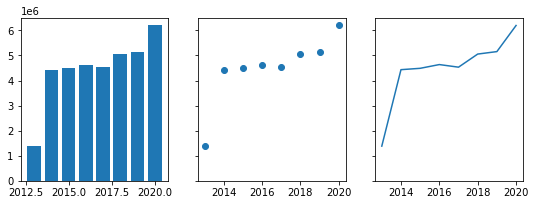

In [174]:
fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True)
axs[0].bar(duesseldorf_yearly_data_neu.index, duesseldorf_yearly_data_neu["sum"])
axs[1].scatter(duesseldorf_yearly_data_neu.index, duesseldorf_yearly_data_neu["sum"])
axs[2].plot(duesseldorf_yearly_data_neu.index, duesseldorf_yearly_data_neu["sum"])

In [177]:
duesseldorf_yearly_data_neu["sum"].pct_change()*100

Datum
2013           NaN
2014    220.528729
2015      1.223149
2016      3.329849
2017     -2.238636
2018     11.532864
2019      1.949868
2020     20.208581
Name: sum, dtype: float64

In [187]:
duesseldorf_yearly_data_neu["Wachstumrate %"]=duesseldorf_yearly_data_neu["sum"].pct_change()*100

In [188]:
duesseldorf_yearly_data_neu

,Bilker Allee IN,Bilker Allee OUT,Christophstrasse,Elisabethstrasse,Fleher Deich Ost stromaufwaerts,Fleher Deich west stromabwaerts,Friedrichstrasse,Kirchfeldstrasse,Koblenzer einwaerts nach TLS,Koblenzer einwaerts vor TLS,Koblenzer stadtauswaerts,Koe Steinstrasse,Lohauser Deich,Mannesmann Ufer,OKB Nord,OKB Sued,sum,change,Wachstumrate %
Datum,,,,,,,,,,,,,,,,,,,
2013,4025.0,3296.0,0.0,0.0,2759.0,3473.0,0.0,16140.0,6633.0,6871.0,9765.0,493172.0,6096.0,31777.0,484001.0,315346.0,1383354.0,NaN,NaN
2014,118669.0,95277.0,4373.0,0.0,132903.0,169327.0,0.0,437850.0,174437.0,189498.0,292275.0,578271.0,352588.0,988143.0,543368.0,357068.0,4434047.0,220.528729,220.528729
2015,101398.0,86455.0,339595.0,0.0,135700.0,161151.0,0.0,426683.0,154625.0,184309.0,278095.0,634475.0,319533.0,917564.0,490598.0,258101.0,4488282.0,1.223149,1.223149
2016,96481.0,85748.0,318468.0,31713.0,90783.0,184599.0,64275.0,432985.0,170239.0,192681.0,285409.0,635361.0,310281.0,939977.0,483154.0,315581.0,4637735.0,3.329849,3.329849
2017,89573.0,85610.0,298199.0,142391.0,143037.0,76275.0,220695.0,237008.0,168546.0,186148.0,272466.0,494709.0,334254.0,921500.0,514224.0,349278.0,4533913.0,-2.238636,-2.238636
2018,101672.0,93140.0,327833.0,163672.0,185461.0,195217.0,312688.0,486679.0,171686.0,198199.0,307417.0,312245.0,375603.0,1042633.0,427155.0,355503.0,5056803.0,11.532864,11.532864
2019,93120.0,88771.0,332095.0,192659.0,193181.0,201227.0,289460.0,409951.0,147888.0,172819.0,189946.0,626035.0,330737.0,1010235.0,550422.0,326858.0,5155404.0,1.949868,1.949868
2020,90833.0,85067.0,316046.0,219318.0,234148.0,285758.0,331401.0,537562.0,144302.0,162197.0,259379.0,767699.0,482292.0,1223019.0,662115.0,396102.0,6197238.0,20.208581,20.208581


## Prozentuale Wachstumsrate der Fahrradfahrer

In [189]:
duesseldorf_yearly_data_neu[["sum","Wachstumrate %"]]

,sum,Wachstumrate %
Datum,,
2013,1383354.0,NaN
2014,4434047.0,220.528729
2015,4488282.0,1.223149
2016,4637735.0,3.329849
2017,4533913.0,-2.238636
2018,5056803.0,11.532864
2019,5155404.0,1.949868
2020,6197238.0,20.208581


# Berlin

In [269]:
import openpyxl
from openpyxl import load_workbook

def filter_colored_cells_excel(excel_file, sheet_nr):

    # Reading the Excel file with pandas:
    highlighted_cells_df = pd.read_excel(excel_file, sheet_name=sheet_nr, convert_float=True)

    # Reading the Excel file with openpyxl.load_workbook:
    highlighted_cells_wb = load_workbook(excel_file, data_only = True)

    # get sheet names:
    sheet_name = highlighted_cells_wb.sheetnames

    # get sheet
    sheet_wb = highlighted_cells_wb[sheet_name[0]]

    # creating pandas df from sheet of workbook:
    sheet_df = pd.DataFrame(sheet_wb)
    #print(type(sheet_df))
    #print(sheet_df)

    # filtering accord to cells background color
    highlighted_cells_df_clean = highlighted_cells_df.copy()
    columns_list = highlighted_cells_df_clean.columns
    for column in sheet_df.columns:
        i = 0
        for cell in sheet_df[column]:
            if cell.fill.start_color.index != '00000000':
                if i <= len(highlighted_cells_df_clean[columns_list[column]]):
                    print(highlighted_cells_df_clean[columns_list[column]][i-1])
                    highlighted_cells_df_clean[columns_list[column]][i-1] = pd.NA
                    print('Spalte',column, 'Zelle',cell,':', cell.fill.start_color.index)

            i = i + 1

    #print('Spalte',column, ':', cell.fill.start_color.index)
    #print('-----------------------------')

    return highlighted_cells_df_clean

In [266]:
excel_file = 'fahrrad_dauerzaehlstellen_berlin.xlsx'
sheet_nrs = [8,9,10,11]

In [267]:
sheet_nr = sheet_nrs[0]

In [ ]:
#highlighted_cells_df_clean = filter_colored_cells_excel(excel_file, sheet_nr)

In [172]:
bikes_berlin_df_2017 = pd.read_excel('fahrrad_dauerzaehlstellen_berlin.xlsx', sheet_name=8)
bikes_berlin_df_2018 = pd.read_excel('fahrrad_dauerzaehlstellen_berlin.xlsx', sheet_name=9)
bikes_berlin_df_2019 = pd.read_excel('fahrrad_dauerzaehlstellen_berlin.xlsx', sheet_name=10)
bikes_berlin_df_2020 = pd.read_excel('fahrrad_dauerzaehlstellen_berlin.xlsx', sheet_name=11)

corona_berlin_df = pd.read_excel('corona_daten_berlin.xlsx') #, index_col='DATE', parse_dates=True)

In [44]:
bikes_berlin_df_2017.head()

,Date,02-MI-JAN-N 01.04.2015,02-MI-JAN-S 01.04.2015,03-MI-SAN-O 01.06.2015,03-MI-SAN-W 01.06.2015,05-FK-OBB-O 01.06.2015,05-FK-OBB-W 01.06.2015,06-FK-FRA-O 01.06.2016,06-FK-FRA-W 01.06.2016,10-PA-BER-N 01.05.2016,...,18-TS-YOR-O 01.04.2015,18-TS-YOR-W 01.04.2015,19-TS-MON 01.05.2015,20-TS-MAR-N 01.05.2016,20-TS-MAR-S 01.05.2016,21-NK-MAY 01.05.2016,23-TK-KAI 01.05.2016,24-MH-ALB 01.07.2015,26-LI-PUP 01.06.2015,27-RE-MAR 01.05.2015
0,2017-01-01 00:00:00,6,5,4,5,16,11,2,6,56,...,8.0,7,6,1,2.0,6,3.0,2,3,2
1,2017-01-01 01:00:00,23,16,5,11,26,28,5,7,31,...,10.0,15,19,4,0.0,31,4.0,6,14,2
2,2017-01-01 02:00:00,17,16,15,11,45,24,9,7,32,...,30.0,14,19,3,5.0,53,2.0,1,15,5
3,2017-01-01 03:00:00,22,22,9,17,52,37,3,7,47,...,17.0,15,22,4,2.0,36,2.0,0,8,1
4,2017-01-01 04:00:00,14,19,4,9,42,18,10,6,14,...,9.0,11,8,2,2.0,34,3.0,0,14,1


In [45]:
bikes_berlin_df_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     8760 non-null   datetime64[ns]
 1   02-MI-JAN-N 01.04.2015   8760 non-null   int64         
 2   02-MI-JAN-S 01.04.2015   8760 non-null   int64         
 3   03-MI-SAN-O 01.06.2015   8760 non-null   int64         
 4   03-MI-SAN-W 01.06.2015   8760 non-null   int64         
 5   05-FK-OBB-O 01.06.2015   8760 non-null   int64         
 6   05-FK-OBB-W 01.06.2015   8760 non-null   int64         
 7   06-FK-FRA-O 01.06.2016   8760 non-null   int64         
 8   06-FK-FRA-W 01.06.2016   8760 non-null   int64         
 9   10-PA-BER-N 01.05.2016   8760 non-null   int64         
 10  10-PA-BER-S 01.05.2016   8760 non-null   int64         
 11  12-PA-SCH 01.03.2012     8760 non-null   int64         
 12  13-CW-PRI 01.04.2015     8760 non-


bikes_berlin_df_2017['Date'] = bikes_berlin_df_2017['Date'].apply(
                                                            lambda x: dt.datetime.strptime(x,'%d%b%Y:%H:%M:%S.%f')

In [46]:
bikes_berlin_df_2017['Date'] = pd.to_datetime(bikes_berlin_df_2017['Date'], format='%Y%m%d') 
bikes_berlin_df_2017['Date']=bikes_berlin_df_2017['Date'].dt.strftime("%m/%d/%y")
bikes_berlin_df_2017['Date']=pd.to_datetime(bikes_berlin_df_2017['Date'])

bikes_berlin_df_2018['Date'] = pd.to_datetime(bikes_berlin_df_2018['Date'], format='%Y%m%d') 
bikes_berlin_df_2018['Date']=bikes_berlin_df_2018['Date'].dt.strftime("%m/%d/%y")
bikes_berlin_df_2018['Date']=pd.to_datetime(bikes_berlin_df_2018['Date'])

bikes_berlin_df_2019['Date'] = pd.to_datetime(bikes_berlin_df_2019['Date'], format='%Y%m%d') 
bikes_berlin_df_2019['Date']=bikes_berlin_df_2019['Date'].dt.strftime("%m/%d/%y")
bikes_berlin_df_2019['Date']=pd.to_datetime(bikes_berlin_df_2019['Date'])

bikes_berlin_df_2020['Date'] = pd.to_datetime(bikes_berlin_df_2020['Date'], format='%Y%m%d') 
bikes_berlin_df_2020['Date']=bikes_berlin_df_2020['Date'].dt.strftime("%m/%d/%y")
bikes_berlin_df_2020['Date']=pd.to_datetime(bikes_berlin_df_2020['Date'])


In [47]:
bikes_berlin_df_2017.head()

,Date,02-MI-JAN-N 01.04.2015,02-MI-JAN-S 01.04.2015,03-MI-SAN-O 01.06.2015,03-MI-SAN-W 01.06.2015,05-FK-OBB-O 01.06.2015,05-FK-OBB-W 01.06.2015,06-FK-FRA-O 01.06.2016,06-FK-FRA-W 01.06.2016,10-PA-BER-N 01.05.2016,...,18-TS-YOR-O 01.04.2015,18-TS-YOR-W 01.04.2015,19-TS-MON 01.05.2015,20-TS-MAR-N 01.05.2016,20-TS-MAR-S 01.05.2016,21-NK-MAY 01.05.2016,23-TK-KAI 01.05.2016,24-MH-ALB 01.07.2015,26-LI-PUP 01.06.2015,27-RE-MAR 01.05.2015
0,2017-01-01,6,5,4,5,16,11,2,6,56,...,8.0,7,6,1,2.0,6,3.0,2,3,2
1,2017-01-01,23,16,5,11,26,28,5,7,31,...,10.0,15,19,4,0.0,31,4.0,6,14,2
2,2017-01-01,17,16,15,11,45,24,9,7,32,...,30.0,14,19,3,5.0,53,2.0,1,15,5
3,2017-01-01,22,22,9,17,52,37,3,7,47,...,17.0,15,22,4,2.0,36,2.0,0,8,1
4,2017-01-01,14,19,4,9,42,18,10,6,14,...,9.0,11,8,2,2.0,34,3.0,0,14,1


In [48]:
bikes_berlin_df_2018.head()

,Date,02-MI-JAN-N 01.04.2015,02-MI-JAN-S 01.04.2015,03-MI-SAN-O 01.06.2015,03-MI-SAN-W 01.06.2015,05-FK-OBB-O 01.06.2015,05-FK-OBB-W 01.06.2015,06-FK-FRA-O 01.06.2016,06-FK-FRA-W 01.06.2016,10-PA-BER-N 01.05.2016,...,18-TS-YOR-O 01.04.2015,18-TS-YOR-W 01.04.2015,19-TS-MON 01.05.2015,20-TS-MAR-N 01.05.2016,20-TS-MAR-S 01.05.2016,21-NK-MAY 01.05.2016,23-TK-KAI 01.05.2016,24-MH-ALB 01.07.2015,26-LI-PUP 01.06.2015,27-RE-MAR 01.05.2015
0,2018-01-01,12,9,15,1,11,18,3.0,6,18,...,7,7,7.0,1,0,9,3,0,11,0
1,2018-01-01,17,16,7,7,26,22,8.0,2,24,...,5,9,21.0,2,1,40,6,0,12,5
2,2018-01-01,25,18,5,12,39,20,11.0,12,23,...,21,16,34.0,1,0,46,1,1,20,7
3,2018-01-01,18,19,8,13,51,22,7.0,6,21,...,18,17,33.0,2,1,43,4,2,11,2
4,2018-01-01,15,12,6,3,27,29,6.0,4,11,...,8,9,17.0,4,0,29,7,0,6,3


In [49]:
bikes_berlin_df_2019.head()

,Date,02-MI-JAN-N 01.04.2015,02-MI-JAN-S 01.04.2015,03-MI-SAN-O 01.06.2015,03-MI-SAN-W 01.06.2015,05-FK-OBB-O 01.06.2015,05-FK-OBB-W 01.06.2015,06-FK-FRA-O 01.06.2016,06-FK-FRA-W 01.06.2016,10-PA-BER-N 01.05.2016,...,18-TS-YOR-O 01.04.2015,18-TS-YOR-W 01.04.2015,19-TS-MON 01.05.2015,20-TS-MAR-N 01.05.2016,20-TS-MAR-S 01.05.2016,21-NK-MAY 01.05.2016,23-TK-KAI 01.05.2016,24-MH-ALB 01.07.2015,26-LI-PUP 01.06.2015,27-RE-MAR 01.05.2015
0,2019-01-01,11.0,13.0,0.0,8.0,12.0,8.0,7.0,17.0,5.0,...,4,0.0,15,0.0,0.0,7.0,0.0,0,13.0,3.0
1,2019-01-01,16.0,9.0,0.0,7.0,33.0,31.0,7.0,1.0,19.0,...,13,0.0,26,1.0,1.0,52.0,1.0,7,16.0,5.0
2,2019-01-01,19.0,18.0,0.0,13.0,26.0,38.0,9.0,3.0,22.0,...,26,0.0,34,2.0,2.0,48.0,5.0,1,18.0,11.0
3,2019-01-01,19.0,19.0,0.0,9.0,40.0,28.0,11.0,6.0,21.0,...,14,0.0,30,1.0,1.0,38.0,3.0,4,16.0,7.0
4,2019-01-01,13.0,15.0,0.0,5.0,32.0,31.0,18.0,3.0,5.0,...,15,0.0,14,1.0,4.0,30.0,6.0,0,10.0,6.0


In [50]:
bikes_berlin_df_2020.head()

,Date,02-MI-JAN-N 01.04.2015,02-MI-JAN-S 01.04.2015,03-MI-SAN-O 01.06.2015,03-MI-SAN-W 01.06.2015,05-FK-OBB-O 01.06.2015,05-FK-OBB-W 01.06.2015,06-FK-FRA-O 01.06.2016,06-FK-FRA-W 01.06.2016,10-PA-BER-N 01.05.2016,...,18-TS-YOR-O 01.04.2015,18-TS-YOR-W 01.04.2015,19-TS-MON 01.05.2015,20-TS-MAR-N 01.05.2016,20-TS-MAR-S 01.05.2016,21-NK-MAY 01.05.2016,23-TK-KAI 01.05.2016,24-MH-ALB 01.07.2015,26-LI-PUP 01.06.2015,27-RE-MAR 01.05.2015
0,2020-01-01,12.0,15.0,8.0,8.0,0.0,0.0,4.0,4.0,5.0,...,1.0,14.0,10.0,1.0,0.0,7.0,2.0,0.0,12.0,5.0
1,2020-01-01,15.0,18.0,14.0,18.0,0.0,0.0,11.0,4.0,20.0,...,6.0,17.0,15.0,1.0,4.0,26.0,5.0,11.0,21.0,7.0
2,2020-01-01,16.0,29.0,12.0,13.0,0.0,0.0,14.0,4.0,23.0,...,5.0,23.0,26.0,3.0,6.0,47.0,7.0,11.0,28.0,9.0
3,2020-01-01,25.0,22.0,6.0,15.0,0.0,0.0,11.0,10.0,15.0,...,6.0,15.0,39.0,2.0,5.0,46.0,7.0,7.0,23.0,3.0
4,2020-01-01,21.0,11.0,8.0,10.0,0.0,0.0,9.0,6.0,8.0,...,9.0,14.0,13.0,3.0,3.0,31.0,7.0,1.0,13.0,6.0


In [51]:
#bikes_berlin_df_2017.info()

In [52]:
bikes_berlin_df_2017_days = bikes_berlin_df_2017.groupby(bikes_berlin_df_2017['Date']).sum()
bikes_berlin_df_2018_days = bikes_berlin_df_2018.groupby(bikes_berlin_df_2018['Date']).sum()
bikes_berlin_df_2019_days = bikes_berlin_df_2019.groupby(bikes_berlin_df_2019['Date']).sum()
bikes_berlin_df_2020_days = bikes_berlin_df_2020.groupby(bikes_berlin_df_2020['Date']).sum()

In [89]:
# Datum als Index setzen

#corona_berlin_df.set_index('Datum', inplace=True)
#bikes_berlin_df_2017_days.set_index('Date', inplace=True)
#bikes_berlin_df_2018_days.set_index('Date', inplace=True)
#bikes_berlin_df_2019_days.set_index('Date', inplace=True)
#bikes_berlin_df_2020_days.set_index('Date', inplace=True)

In [195]:
#bikes_berlin_df_2017_days.head()
#bikes_berlin_df_2018_days.head()
#bikes_berlin_df_2019_days.head()
#bikes_berlin_df_2020_days.head()

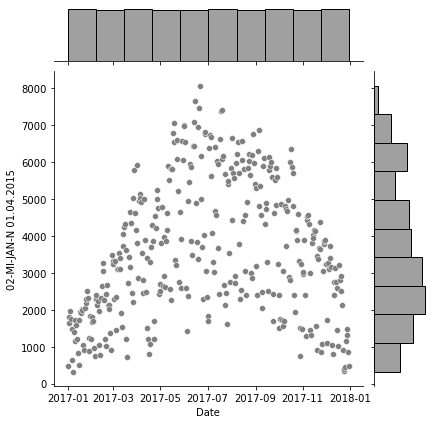

In [196]:
sns.jointplot(x = 'Date', y = '02-MI-JAN-N 01.04.2015', data = bikes_berlin_df_2017_days, color = 'grey')

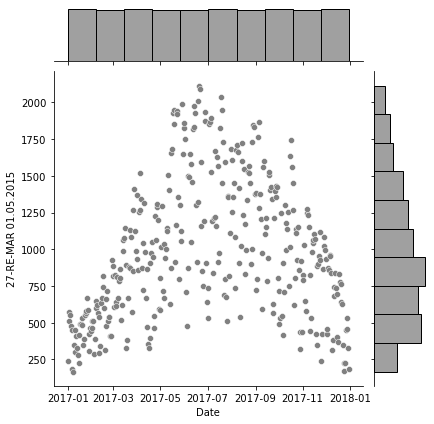

In [197]:
sns.jointplot(x = 'Date', y = '27-RE-MAR 01.05.2015', data = bikes_berlin_df_2017_days, color = 'grey')

In [198]:
corona_berlin_df.head()

,Datum,Fallzahl,Neue Fälle,Genesene,Todesfälle
0,2020-03-16,332.0,332.0,0.0,0.0
1,2020-03-17,383.0,51.0,0.0,0.0
2,2020-03-18,519.0,136.0,0.0,0.0
3,2020-03-19,688.0,169.0,0.0,0.0
4,2020-03-20,868.0,180.0,0.0,1.0


In [199]:
corona_berlin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331 entries, 0 to 330
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Datum       330 non-null    datetime64[ns]
 1   Fallzahl    330 non-null    float64       
 2   Neue Fälle  330 non-null    float64       
 3   Genesene    330 non-null    float64       
 4   Todesfälle  330 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 13.1 KB


## Visualisierung der Coronafallzahlen in Berlin

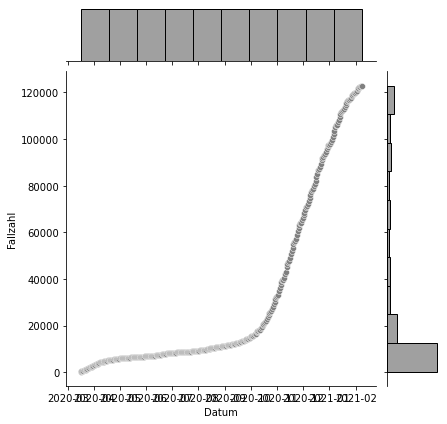

In [200]:
sns.jointplot(x = 'Datum', y = 'Fallzahl', data = corona_berlin_df, color = 'grey')

In [201]:
corona_berlin_df.head()

,Datum,Fallzahl,Neue Fälle,Genesene,Todesfälle
0,2020-03-16,332.0,332.0,0.0,0.0
1,2020-03-17,383.0,51.0,0.0,0.0
2,2020-03-18,519.0,136.0,0.0,0.0
3,2020-03-19,688.0,169.0,0.0,0.0
4,2020-03-20,868.0,180.0,0.0,1.0


In [202]:
bikes_berlin_df_2017_days.head()

,02-MI-JAN-N 01.04.2015,02-MI-JAN-S 01.04.2015,03-MI-SAN-O 01.06.2015,03-MI-SAN-W 01.06.2015,05-FK-OBB-O 01.06.2015,05-FK-OBB-W 01.06.2015,06-FK-FRA-O 01.06.2016,06-FK-FRA-W 01.06.2016,10-PA-BER-N 01.05.2016,10-PA-BER-S 01.05.2016,...,18-TS-YOR-O 01.04.2015,18-TS-YOR-W 01.04.2015,19-TS-MON 01.05.2015,20-TS-MAR-N 01.05.2016,20-TS-MAR-S 01.05.2016,21-NK-MAY 01.05.2016,23-TK-KAI 01.05.2016,24-MH-ALB 01.07.2015,26-LI-PUP 01.06.2015,27-RE-MAR 01.05.2015
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-01,481,452,273,312,884,738,275,202,1448,398,...,404.0,328,602,103,80.0,830,135.0,103,569,240
2017-01-02,1647,1750,708,753,1884,1833,896,695,2195,1154,...,919.0,876,1612,358,221.0,2060,508.0,169,1186,511
2017-01-03,1795,1844,777,897,2072,1876,908,644,2339,1172,...,960.0,903,1528,350,206.0,2301,531.0,126,1244,576
2017-01-04,1969,2022,888,1004,2303,2159,1014,734,2754,1512,...,1115.0,982,1743,344,201.0,2563,648.0,274,1475,553
2017-01-05,1738,1759,817,876,2037,1853,714,486,2297,1254,...,839.0,722,1449,283,182.0,2092,498.0,206,1214,477


In [203]:
# Spalte sum erstellen

bikes_berlin_df_2017_days['sum'] = bikes_berlin_df_2017_days.loc[:].sum(axis=1)
bikes_berlin_df_2018_days['sum'] = bikes_berlin_df_2018_days.loc[:].sum(axis=1)
bikes_berlin_df_2019_days['sum'] = bikes_berlin_df_2019_days.loc[:].sum(axis=1)
bikes_berlin_df_2020_days['sum'] = bikes_berlin_df_2020_days.loc[:].sum(axis=1)

In [204]:
bikes_berlin_df_2017_days.head()

,02-MI-JAN-N 01.04.2015,02-MI-JAN-S 01.04.2015,03-MI-SAN-O 01.06.2015,03-MI-SAN-W 01.06.2015,05-FK-OBB-O 01.06.2015,05-FK-OBB-W 01.06.2015,06-FK-FRA-O 01.06.2016,06-FK-FRA-W 01.06.2016,10-PA-BER-N 01.05.2016,10-PA-BER-S 01.05.2016,...,18-TS-YOR-W 01.04.2015,19-TS-MON 01.05.2015,20-TS-MAR-N 01.05.2016,20-TS-MAR-S 01.05.2016,21-NK-MAY 01.05.2016,23-TK-KAI 01.05.2016,24-MH-ALB 01.07.2015,26-LI-PUP 01.06.2015,27-RE-MAR 01.05.2015,sum
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-01,481,452,273,312,884,738,275,202,1448,398,...,328,602,103,80.0,830,135.0,103,569,240,10059.0
2017-01-02,1647,1750,708,753,1884,1833,896,695,2195,1154,...,876,1612,358,221.0,2060,508.0,169,1186,511,24999.0
2017-01-03,1795,1844,777,897,2072,1876,908,644,2339,1172,...,903,1528,350,206.0,2301,531.0,126,1244,576,26241.0
2017-01-04,1969,2022,888,1004,2303,2159,1014,734,2754,1512,...,982,1743,344,201.0,2563,648.0,274,1475,553,29775.0
2017-01-05,1738,1759,817,876,2037,1853,714,486,2297,1254,...,722,1449,283,182.0,2092,498.0,206,1214,477,24734.0


In [205]:
bikes_berlin_df_2018_days.head()

,02-MI-JAN-N 01.04.2015,02-MI-JAN-S 01.04.2015,03-MI-SAN-O 01.06.2015,03-MI-SAN-W 01.06.2015,05-FK-OBB-O 01.06.2015,05-FK-OBB-W 01.06.2015,06-FK-FRA-O 01.06.2016,06-FK-FRA-W 01.06.2016,10-PA-BER-N 01.05.2016,10-PA-BER-S 01.05.2016,...,18-TS-YOR-W 01.04.2015,19-TS-MON 01.05.2015,20-TS-MAR-N 01.05.2016,20-TS-MAR-S 01.05.2016,21-NK-MAY 01.05.2016,23-TK-KAI 01.05.2016,24-MH-ALB 01.07.2015,26-LI-PUP 01.06.2015,27-RE-MAR 01.05.2015,sum
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-01,560,516,309,344,900,819,282.0,266,1059,549.0,...,429,710.0,129,84,949,180,131,845,194,11442.0
2018-01-02,1572,1626,713,774,1964,1824,822.0,683,2632,1201.0,...,961,1490.0,373,217,2328,482,123,1240,516,25908.0
2018-01-03,1357,1366,627,677,1689,1548,664.0,568,2819,1185.0,...,791,1203.0,289,197,1895,530,188,1087,443,22537.0
2018-01-04,2153,2147,972,1059,2571,2430,1012.0,810,3694,1728.0,...,1238,1965.0,400,285,3015,690,264,1592,658,34156.0
2018-01-05,2655,2775,1221,1300,3233,3171,1283.0,1085,3021,1986.0,...,1548,2247.0,449,290,3766,733,410,2060,795,40570.0


In [206]:
bikes_berlin_df_2019_days.head()

,02-MI-JAN-N 01.04.2015,02-MI-JAN-S 01.04.2015,03-MI-SAN-O 01.06.2015,03-MI-SAN-W 01.06.2015,05-FK-OBB-O 01.06.2015,05-FK-OBB-W 01.06.2015,06-FK-FRA-O 01.06.2016,06-FK-FRA-W 01.06.2016,10-PA-BER-N 01.05.2016,10-PA-BER-S 01.05.2016,...,18-TS-YOR-W 01.04.2015,19-TS-MON 01.05.2015,20-TS-MAR-N 01.05.2016,20-TS-MAR-S 01.05.2016,21-NK-MAY 01.05.2016,23-TK-KAI 01.05.2016,24-MH-ALB 01.07.2015,26-LI-PUP 01.06.2015,27-RE-MAR 01.05.2015,sum
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,458.0,423.0,61.0,328.0,813.0,751.0,312.0,187.0,442.0,402.0,...,0.0,626,98.0,70.0,735.0,114.0,112,583.0,182.0,8100.0
2019-01-02,1818.0,1925.0,34.0,953.0,2111.0,2081.0,975.0,819.0,1581.0,1116.0,...,0.0,1720,270.0,266.0,2227.0,570.0,140,1291.0,633.0,24817.0
2019-01-03,2211.0,2298.0,0.0,1224.0,2709.0,2614.0,1150.0,957.0,1597.0,1292.0,...,0.0,2093,306.0,261.0,2689.0,698.0,174,1505.0,710.0,29203.0
2019-01-04,2026.0,2074.0,0.0,973.0,2464.0,2413.0,1083.0,855.0,1608.0,1154.0,...,0.0,1862,298.0,212.0,2885.0,572.0,166,1327.0,551.0,26626.0
2019-01-05,1325.0,1039.0,0.0,578.0,2053.0,2030.0,822.0,668.0,1000.0,957.0,...,0.0,1508,187.0,170.0,2495.0,334.0,160,840.0,399.0,20072.0


In [207]:
bikes_berlin_df_2020_days.head()

,02-MI-JAN-N 01.04.2015,02-MI-JAN-S 01.04.2015,03-MI-SAN-O 01.06.2015,03-MI-SAN-W 01.06.2015,05-FK-OBB-O 01.06.2015,05-FK-OBB-W 01.06.2015,06-FK-FRA-O 01.06.2016,06-FK-FRA-W 01.06.2016,10-PA-BER-N 01.05.2016,10-PA-BER-S 01.05.2016,...,18-TS-YOR-W 01.04.2015,19-TS-MON 01.05.2015,20-TS-MAR-N 01.05.2016,20-TS-MAR-S 01.05.2016,21-NK-MAY 01.05.2016,23-TK-KAI 01.05.2016,24-MH-ALB 01.07.2015,26-LI-PUP 01.06.2015,27-RE-MAR 01.05.2015,sum
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,579.0,603.0,396.0,469.0,0.0,0.0,327.0,286.0,610.0,486.0,...,484.0,679.0,103.0,114.0,1031.0,203.0,157.0,785.0,240.0,9075.0
2020-01-02,1948.0,2088.0,1019.0,1199.0,0.0,0.0,990.0,1049.0,1759.0,1189.0,...,1304.0,1769.0,313.0,274.0,2422.0,525.0,209.0,1395.0,663.0,23772.0
2020-01-03,1827.0,1903.0,906.0,999.0,0.0,0.0,970.0,952.0,1586.0,1068.0,...,1257.0,1619.0,291.0,286.0,2546.0,499.0,173.0,1150.0,610.0,21768.0
2020-01-04,947.0,1051.0,440.0,502.0,0.0,0.0,510.0,501.0,890.0,709.0,...,894.0,1009.0,160.0,118.0,1958.0,267.0,106.0,557.0,356.0,12874.0
2020-01-05,1127.0,1128.0,564.0,678.0,0.0,0.0,610.0,507.0,871.0,754.0,...,888.0,1241.0,158.0,153.0,2025.0,279.0,144.0,1168.0,406.0,15171.0


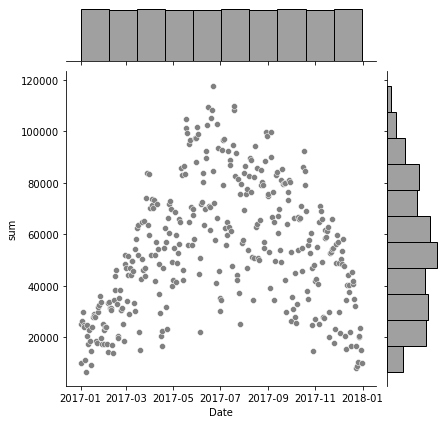

In [208]:
sns.jointplot(x = 'Date', y = 'sum', data = bikes_berlin_df_2017_days, color = 'grey')

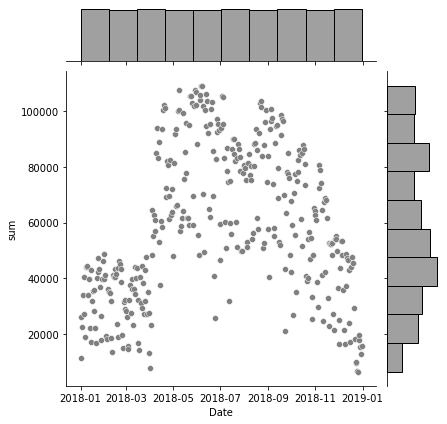

In [209]:
sns.jointplot(x = 'Date', y = 'sum', data = bikes_berlin_df_2018_days, color = 'grey')

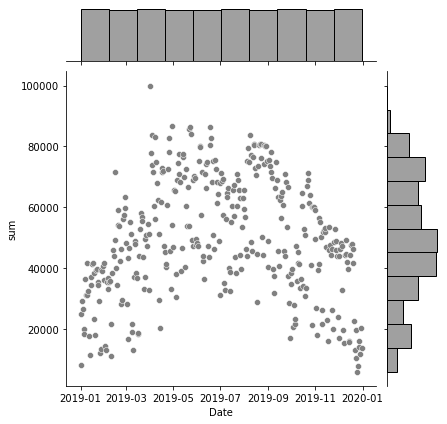

In [210]:
sns.jointplot(x = 'Date', y = 'sum', data = bikes_berlin_df_2019_days, color = 'grey')

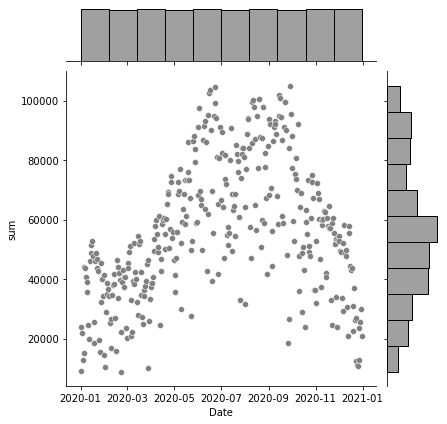

In [211]:
sns.jointplot(x = 'Date', y = 'sum', data = bikes_berlin_df_2020_days, color = 'grey')

In [212]:
df1 = bikes_berlin_df_2017_days.append(bikes_berlin_df_2018_days)
df2 = df1.append(bikes_berlin_df_2019_days)
bikes_berlin_df_total_days = df2.append(bikes_berlin_df_2020_days)

In [214]:
bikes_berlin_df_total_days.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1461 entries, 2017-01-01 to 2020-12-31
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   02-MI-JAN-N 01.04.2015   1461 non-null   float64
 1   02-MI-JAN-S 01.04.2015   1461 non-null   float64
 2   03-MI-SAN-O 01.06.2015   1461 non-null   float64
 3   03-MI-SAN-W 01.06.2015   1461 non-null   float64
 4   05-FK-OBB-O 01.06.2015   1461 non-null   float64
 5   05-FK-OBB-W 01.06.2015   1461 non-null   float64
 6   06-FK-FRA-O 01.06.2016   1461 non-null   float64
 7   06-FK-FRA-W 01.06.2016   1461 non-null   float64
 8   10-PA-BER-N 01.05.2016   1461 non-null   float64
 9   10-PA-BER-S 01.05.2016   1461 non-null   float64
 10  12-PA-SCH 01.03.2012     1461 non-null   float64
 11  13-CW-PRI 01.04.2015     1461 non-null   float64
 12  15-SP-KLO-N 01.06.2016   1461 non-null   float64
 13  15-SP-KLO-S 01.06.2016   1461 non-null   float64
 14  17-SZ-

## Umgeformte Datensätze von 1.1.2016 bis 31.12.2020 werden in einer Persistenzschicht abgespeichert in ein eigenes Dataframe (.csv)

In [279]:
bikes_berlin_df_total_days.to_csv("bikes_berlin_df_2017_2020.csv", sep=";" )

In [281]:
x=pd.read_csv('bikes_berlin_df_2017_2020.csv', delimiter=';', parse_dates=True)

In [282]:
x

,Date,02-MI-JAN-N 01.04.2015,02-MI-JAN-S 01.04.2015,03-MI-SAN-O 01.06.2015,03-MI-SAN-W 01.06.2015,05-FK-OBB-O 01.06.2015,05-FK-OBB-W 01.06.2015,06-FK-FRA-O 01.06.2016,06-FK-FRA-W 01.06.2016,10-PA-BER-N 01.05.2016,...,18-TS-YOR-W 01.04.2015,19-TS-MON 01.05.2015,20-TS-MAR-N 01.05.2016,20-TS-MAR-S 01.05.2016,21-NK-MAY 01.05.2016,23-TK-KAI 01.05.2016,24-MH-ALB 01.07.2015,26-LI-PUP 01.06.2015,27-RE-MAR 01.05.2015,sum
0,2017-01-01,481.0,452.0,273.0,312.0,884.0,738.0,275.0,202.0,1448.0,...,328.0,602.0,103.0,80.0,830.0,135.0,103.0,569.0,240.0,10059.0
1,2017-01-02,1647.0,1750.0,708.0,753.0,1884.0,1833.0,896.0,695.0,2195.0,...,876.0,1612.0,358.0,221.0,2060.0,508.0,169.0,1186.0,511.0,24999.0
2,2017-01-03,1795.0,1844.0,777.0,897.0,2072.0,1876.0,908.0,644.0,2339.0,...,903.0,1528.0,350.0,206.0,2301.0,531.0,126.0,1244.0,576.0,26241.0
3,2017-01-04,1969.0,2022.0,888.0,1004.0,2303.0,2159.0,1014.0,734.0,2754.0,...,982.0,1743.0,344.0,201.0,2563.0,648.0,274.0,1475.0,553.0,29775.0
4,2017-01-05,1738.0,1759.0,817.0,876.0,2037.0,1853.0,714.0,486.0,2297.0,...,722.0,1449.0,283.0,182.0,2092.0,498.0,206.0,1214.0,477.0,24734.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,2020-12-27,674.0,686.0,553.0,658.0,0.0,0.0,533.0,472.0,686.0,...,665.0,934.0,172.0,156.0,1244.0,341.0,156.0,967.0,369.0,12808.0
1457,2020-12-28,1399.0,1431.0,863.0,913.0,0.0,0.0,1077.0,1039.0,1486.0,...,1167.0,1654.0,349.0,266.0,2202.0,523.0,336.0,1474.0,730.0,23413.0
1458,2020-12-29,1539.0,1616.0,944.0,1017.0,0.0,0.0,1170.0,1071.0,1539.0,...,1368.0,1875.0,322.0,241.0,2737.0,550.0,330.0,1560.0,735.0,25418.0
1459,2020-12-30,1843.0,1899.0,1152.0,1173.0,0.0,0.0,1433.0,1325.0,1756.0,...,1718.0,2227.0,352.0,295.0,2798.0,669.0,352.0,1977.0,830.0,29956.0


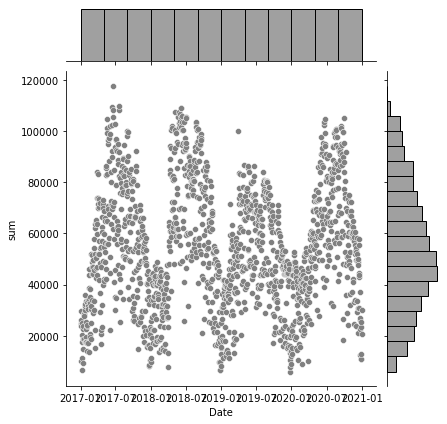

In [215]:
sns.jointplot(x = 'Date', y = 'sum', data = bikes_berlin_df_total_days, color = 'grey')

In [217]:
berlin_yearly_data=bikes_berlin_df_total_days.copy()

In [218]:
berlin_yearly_data.index=berlin_yearly_data.index.year

In [220]:
berlin_yearly_data_neu=berlin_yearly_data.groupby(berlin_yearly_data.index).sum()

In [222]:
berlin_yearly_data_neu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 2017 to 2020
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   02-MI-JAN-N 01.04.2015   4 non-null      float64
 1   02-MI-JAN-S 01.04.2015   4 non-null      float64
 2   03-MI-SAN-O 01.06.2015   4 non-null      float64
 3   03-MI-SAN-W 01.06.2015   4 non-null      float64
 4   05-FK-OBB-O 01.06.2015   4 non-null      float64
 5   05-FK-OBB-W 01.06.2015   4 non-null      float64
 6   06-FK-FRA-O 01.06.2016   4 non-null      float64
 7   06-FK-FRA-W 01.06.2016   4 non-null      float64
 8   10-PA-BER-N 01.05.2016   4 non-null      float64
 9   10-PA-BER-S 01.05.2016   4 non-null      float64
 10  12-PA-SCH 01.03.2012     4 non-null      float64
 11  13-CW-PRI 01.04.2015     4 non-null      float64
 12  15-SP-KLO-N 01.06.2016   4 non-null      float64
 13  15-SP-KLO-S 01.06.2016   4 non-null      float64
 14  17-SZ-BRE-O 01.05.2016  

In [224]:
berlin_yearly_data_neu.head()

,02-MI-JAN-N 01.04.2015,02-MI-JAN-S 01.04.2015,03-MI-SAN-O 01.06.2015,03-MI-SAN-W 01.06.2015,05-FK-OBB-O 01.06.2015,05-FK-OBB-W 01.06.2015,06-FK-FRA-O 01.06.2016,06-FK-FRA-W 01.06.2016,10-PA-BER-N 01.05.2016,10-PA-BER-S 01.05.2016,...,18-TS-YOR-W 01.04.2015,19-TS-MON 01.05.2015,20-TS-MAR-N 01.05.2016,20-TS-MAR-S 01.05.2016,21-NK-MAY 01.05.2016,23-TK-KAI 01.05.2016,24-MH-ALB 01.07.2015,26-LI-PUP 01.06.2015,27-RE-MAR 01.05.2015,sum
Date,,,,,,,,,,,,,,,,,,,,,
2017,1298912.0,1357310.0,575329.0,652568.0,1653230.0,1580841.0,678369.0,510679.0,1365335.0,831937.0,...,798822.0,1146112.0,228018.0,143653.0,1609858.0,348972.0,169596.0,1070484.0,357853.0,19631392.0
2018,1482512.0,1536180.0,533479.0,756830.0,1890336.0,1814756.0,481089.0,624618.0,1085642.0,915998.0,...,920461.0,1244698.0,231108.0,174308.0,1804532.0,426637.0,188306.0,1201692.0,430963.0,21369545.0
2019,1468043.0,1532436.0,110470.0,823258.0,684056.0,612695.0,775878.0,649851.0,1064359.0,907225.0,...,838011.0,1322731.0,201213.0,171664.0,1836224.0,446900.0,177604.0,1088763.0,445697.0,18024377.0
2020,1508341.0,1652045.0,789993.0,893715.0,0.0,0.0,949299.0,827479.0,1235081.0,1080466.0,...,1128707.0,1539027.0,229058.0,209250.0,1891706.0,467890.0,217001.0,1211718.0,556611.0,20485266.0


### Vergleich Düsseldorf - Berlin

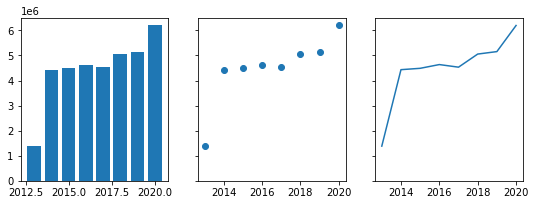

In [231]:
fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True)
axs[0].bar(duesseldorf_yearly_data_neu.index, duesseldorf_yearly_data_neu["sum"])
axs[1].scatter(duesseldorf_yearly_data_neu.index, duesseldorf_yearly_data_neu["sum"])
axs[2].plot(duesseldorf_yearly_data_neu.index, duesseldorf_yearly_data_neu["sum"])

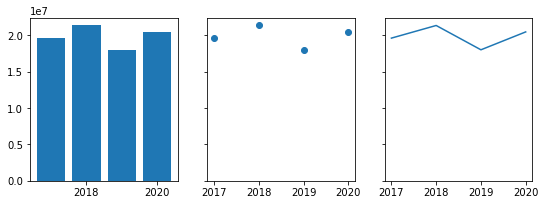

In [225]:
fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True)
axs[0].bar(berlin_yearly_data_neu.index, berlin_yearly_data_neu["sum"])
axs[1].scatter(berlin_yearly_data_neu.index, berlin_yearly_data_neu["sum"])
axs[2].plot(berlin_yearly_data_neu.index, berlin_yearly_data_neu["sum"])


In [226]:
berlin_yearly_data_neu["sum"].pct_change()*100

Date
2017          NaN
2018     8.853947
2019   -15.653904
2020    13.653115
Name: sum, dtype: float64

In [229]:
berlin_yearly_data_neu["Wachstumrate %"]=berlin_yearly_data_neu["sum"].pct_change()*100

In [230]:
berlin_yearly_data_neu[["sum","Wachstumrate %"]]


,sum,Wachstumrate %
Date,,
2017,19631392.0,NaN
2018,21369545.0,8.853947
2019,18024377.0,-15.653904
2020,20485266.0,13.653115


In [232]:
duesseldorf_yearly_data_neu[["sum","Wachstumrate %"]]


,sum,Wachstumrate %
Datum,,
2013,1383354.0,NaN
2014,4434047.0,220.528729
2015,4488282.0,1.223149
2016,4637735.0,3.329849
2017,4533913.0,-2.238636
2018,5056803.0,11.532864
2019,5155404.0,1.949868
2020,6197238.0,20.208581
